<a href="https://colab.research.google.com/github/QAtester-MM/Data-Science_Machine-Learning/blob/master/Crypto_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
with zipfile.ZipFile("/content/BitFinexData.zip", "r") as zipf:
  zipf.extractall("/content/bitfinex/")

In [ ]:
import pandas as pd
bitcoin = pd.read_csv("/content/bitfinex/Bitfinex_BTCUSD_d.csv", skiprows=1)[1:-750]       # берем данные из файла Bitfinex_BTCUSD_d.csv за исключением первой строки. Также исключается текущий день, т.к. он ещё не закончен, и данные по нему не полные.
bitcoin["date"] = pd.to_datetime(bitcoin["date"])                                          # из столбца "date" удалили значения времени, осталась только дата
bitcoin = bitcoin[::-1]                                                                    # отображаем таблицу в обратном порядке (снизу вверх)
bitcoin = bitcoin.reset_index(drop=True)
bitcoin.head()                                                                             # смотрим, что получилось в результате преобразований:

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1488240000,2017-02-28,BTC/USD,1195.5,1216.0,1176.6,1189.1,16251499.88,13608.74
1,1488326400,2017-03-01,BTC/USD,1189.1,1236.4,1186.0,1233.2,20165589.45,16589.62
2,1488412800,2017-03-02,BTC/USD,1233.2,1285.9,1212.0,1258.0,26536494.73,21274.82
3,1488499200,2017-03-03,BTC/USD,1258.0,1294.9,1256.2,1289.2,20748814.46,16223.73
4,1488585600,2017-03-04,BTC/USD,1289.2,1291.9,1240.0,1267.8,14131545.81,11156.61


In [ ]:
bitcoin.tail()

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
1500,1617840000000,2021-04-08,BTC/USD,55962.000000,58155.0,55714.0,58110.0,2.604657e+08,4482.287596
1501,1617926400000,2021-04-09,BTC/USD,58110.000000,58880.0,57713.0,58134.0,2.179731e+08,3749.493697
1502,1618012800000,2021-04-10,BTC/USD,58134.090643,61243.0,57900.0,59812.0,5.858312e+08,9794.542479
1503,1618099200000,2021-04-11,BTC/USD,59817.073785,60722.0,59308.0,60032.0,2.789436e+08,4646.581998
1504,1618185600000,2021-04-12,BTC/USD,60033.000000,61338.0,59492.0,59874.0,3.291828e+08,5497.925195


In [ ]:
bitcoin.shape                 # смотрим размерность датасета (кол-во строк, кол-во столбцов):

(1505, 9)

In [ ]:
bitcoin.describe()            # смотрим стат.характеристики датасета.

,unix,open,high,low,close,Volume USD,Volume BTC
count,1.505000e+03,1505.000000,1505.000000,1505.000000,1505.000000,1.505000e+03,1505.000000
mean,2.873685e+11,10391.204814,10725.169079,10041.485073,10430.163678,1.776724e+08,20334.129265
std,6.142842e+11,10827.948289,11222.174990,10435.903384,10900.643207,2.229820e+08,20744.553716
min,1.488240e+09,942.130000,981.000000,888.200000,942.130000,4.390000e+02,3.079000
25%,1.520726e+09,5234.400000,5376.000000,5055.000000,5238.000000,4.233872e+07,6475.282595
50%,1.553213e+09,7974.400000,8185.000000,7711.000000,7977.850000,9.154748e+07,13149.603522
75%,1.585699e+09,10369.000000,10623.000000,10064.000000,10374.000000,2.204737e+08,27117.630000
max,1.618186e+12,61203.000000,61699.000000,59492.000000,61202.887014,2.223208e+09,189674.010000


In [ ]:
bitcoin.describe

<bound method NDFrame.describe of                unix       date   symbol  ...    close    Volume USD    Volume BTC
0        1488240000 2017-02-28  BTC/USD  ...   1189.1  1.625150e+07  13608.740000
1        1488326400 2017-03-01  BTC/USD  ...   1233.2  2.016559e+07  16589.620000
2        1488412800 2017-03-02  BTC/USD  ...   1258.0  2.653649e+07  21274.820000
3        1488499200 2017-03-03  BTC/USD  ...   1289.2  2.074881e+07  16223.730000
4        1488585600 2017-03-04  BTC/USD  ...   1267.8  1.413155e+07  11156.610000
...             ...        ...      ...  ...      ...           ...           ...
1500  1617840000000 2021-04-08  BTC/USD  ...  58110.0  2.604657e+08   4482.287596
1501  1617926400000 2021-04-09  BTC/USD  ...  58134.0  2.179731e+08   3749.493697
1502  1618012800000 2021-04-10  BTC/USD  ...  59812.0  5.858312e+08   9794.542479
1503  1618099200000 2021-04-11  BTC/USD  ...  60032.0  2.789436e+08   4646.581998
1504  1618185600000 2021-04-12  BTC/USD  ...  59874.0  3.291828e

# **Визуализация **

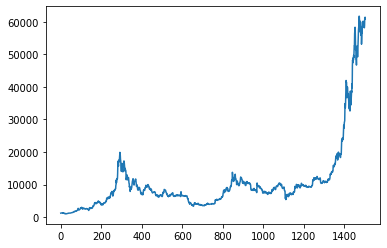

In [ ]:
bitcoin["high"].plot()                              # график максимумов

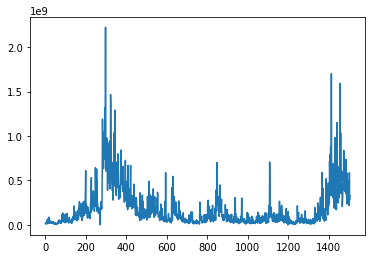

In [ ]:
bitcoin["Volume USD"].plot()                          # график объема торгов в USD

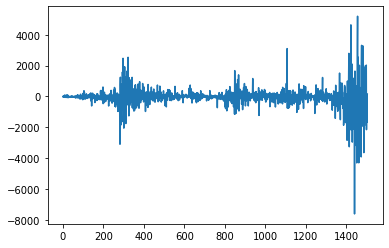

In [ ]:
(bitcoin["open"] - bitcoin["close"]).plot()           # график разницы между открытием и закрытием

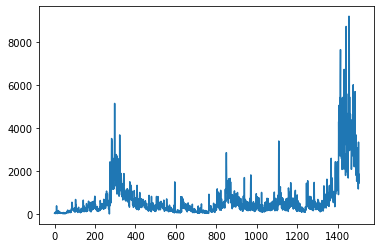

In [ ]:
(bitcoin["high"] - bitcoin["low"]).plot()               # график разницы между МАКС-МИН

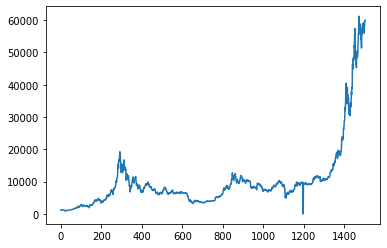

In [ ]:
(bitcoin["Volume USD"] / bitcoin["Volume BTC"]).plot()

In [ ]:
bitcoin["weekday"] = bitcoin["date"].dt.weekday             # добавили колонку (столбец) "день недели"
bitcoin["year"] = bitcoin["date"].dt.year                   # добавили колонку (столбец) "год"
bitcoin["month"] = bitcoin["date"].dt.month                 # добавили колонку (столбец) "месяц"

# Среднее значение закрытия по дням недели

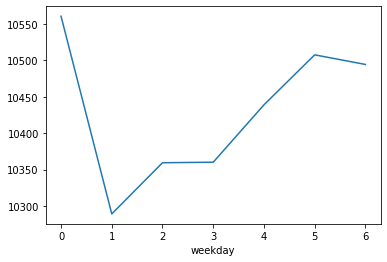

In [ ]:
bitcoin.groupby("weekday")["close"].mean().plot()

#Объем торгов в USD по дням недели

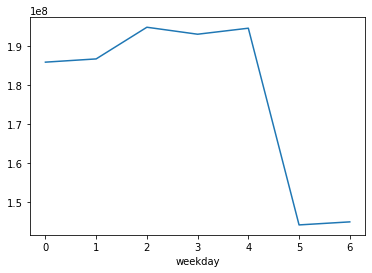

In [ ]:
bitcoin.groupby("weekday")["Volume USD"].mean().plot()

In [ ]:
bitcoin.head(3)

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC,weekday,year,month
0,1488240000,2017-02-28,BTC/USD,1195.5,1216.0,1176.6,1189.1,16251499.88,13608.74,1,2017,2
1,1488326400,2017-03-01,BTC/USD,1189.1,1236.4,1186.0,1233.2,20165589.45,16589.62,2,2017,3
2,1488412800,2017-03-02,BTC/USD,1233.2,1285.9,1212.0,1258.0,26536494.73,21274.82,3,2017,3


In [ ]:
# open - close — не имеет смысла 
# (open-close) / (high-low) — имеет смысл
# volume USD - Volume BTC

In [ ]:
bitcoin["open2high"] = ((bitcoin["open"] - bitcoin["close"]) / (bitcoin["high"] - bitcoin["low"])).abs()     # инициировали переменную "open2high"

In [ ]:
for day in range(1,15):
  bitcoin[f"close_d{day}"] = bitcoin["close"].shift(day)                       #делаем смещение на 1 день


bitcoin["close_avg_2m"] = bitcoin["close"].shift(1).rolling(window=60).mean()  # добавили столбец, где отображаем среднее значения закрытия за 2 месяца (со смещением на 1 день)
bitcoin.fillna(method="bfill", inplace=True)                                   # заполняем средними значениями пустые ячейки
bitcoin.drop(columns=["unix", "date", "symbol"], axis=1, inplace=True)         # удаляем столбцы "unix", "date" и "symbol"

In [ ]:
bitcoin.head(15)

,open,high,low,close,Volume USD,Volume BTC,weekday,year,month,open2high,close_d1,close_d2,close_d3,close_d4,close_d5,close_d6,close_d7,close_d8,close_d9,close_d10,close_d11,close_d12,close_d13,close_d14,close_avg_2m
0,1195.5,1216.0,1176.6,1189.1,16251499.88,13608.74,1,2017,2,0.162437,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
1,1189.1,1236.4,1186.0,1233.2,20165589.45,16589.62,2,2017,3,0.875000,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
2,1233.2,1285.9,1212.0,1258.0,26536494.73,21274.82,3,2017,3,0.335589,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
3,1258.0,1294.9,1256.2,1289.2,20748814.46,16223.73,4,2017,3,0.806202,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
4,1289.2,1291.9,1240.0,1267.8,14131545.81,11156.61,5,2017,3,0.412331,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
5,1267.8,1279.9,1245.0,1278.4,8495853.37,6711.15,6,2017,3,0.303725,1267.8,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
6,1278.4,1287.8,1268.0,1279.2,10069995.03,7875.30,0,2017,3,0.040404,1278.4,1267.8,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
7,1279.2,1282.0,1185.0,1232.4,35444302.78,28634.69,1,2017,3,0.482474,1279.2,1278.4,1267.8,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
8,1232.4,1243.6,1142.2,1150.0,41164704.13,34649.53,2,2017,3,0.812623,1232.4,1279.2,1278.4,1267.8,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667
9,1150.0,1207.6,1136.0,1190.4,22985798.25,19542.81,3,2017,3,0.564246,1150.0,1232.4,1279.2,1278.4,1267.8,1289.2,1258.0,1233.2,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1186.611667


In [ ]:
bitcoin = pd.get_dummies(bitcoin, columns=["weekday", "year", "month"])  # раскладываем эти столбцы в бинарные значения ...

In [ ]:
bitcoin.shape                                                            # ... и получаем 46 столбцов вместо 9 изначальных

(1505, 46)

In [ ]:
bitcoin.tail(10)

,open,high,low,close,Volume USD,Volume BTC,open2high,close_d1,close_d2,close_d3,close_d4,close_d5,close_d6,close_d7,close_d8,close_d9,close_d10,close_d11,close_d12,close_d13,close_d14,close_avg_2m,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,year_2017,year_2018,year_2019,year_2020,year_2021,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1495,58958.195190,59841.0,56872.0,57020.000000,3.782785e+08,6634.136980,0.652811,58959.000000,58724.000000,58796.000000,58840.000000,57675.000000,55780.000000,55886.000000,54993.000000,51358.0,52328.0,54336.799828,54070.000000,57366.000000,58079.000000,51360.302850,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1496,57029.000000,58480.0,56500.0,58240.239187,2.895681e+08,4971.959006,0.611737,57020.000000,58959.000000,58724.000000,58796.000000,58840.000000,57675.000000,55780.000000,55886.000000,54993.0,51358.0,52328.000000,54336.799828,54070.000000,57366.000000,51717.686183,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1497,58241.000000,59250.0,56850.0,59145.000000,3.309305e+08,5595.239989,0.376667,58240.239187,57020.000000,58959.000000,58724.000000,58796.000000,58840.000000,57675.000000,55780.000000,55886.0,54993.0,51358.000000,52328.000000,54336.799828,54070.000000,52060.573503,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1498,59145.000000,59499.0,57401.0,57991.000000,3.257186e+08,5616.709752,0.550048,59145.000000,58240.239187,57020.000000,58959.000000,58724.000000,58796.000000,58840.000000,57675.000000,55780.0,55886.0,54993.000000,51358.000000,52328.000000,54336.799828,52430.464365,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1499,57994.000000,58639.0,55555.0,55962.000000,4.951918e+08,8848.715118,0.658885,57991.000000,59145.000000,58240.239187,57020.000000,58959.000000,58724.000000,58796.000000,58840.000000,57675.0,55780.0,55886.000000,54993.000000,51358.000000,52328.000000,52759.314365,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1500,55962.000000,58155.0,55714.0,58110.000000,2.604657e+08,4482.287596,0.879967,55962.000000,57991.000000,59145.000000,58240.239187,57020.000000,58959.000000,58724.000000,58796.000000,58840.0,57675.0,55780.000000,55886.000000,54993.000000,51358.000000,53038.114365,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1501,58110.000000,58880.0,57713.0,58134.000000,2.179731e+08,3749.493697,0.020566,58110.000000,55962.000000,57991.000000,59145.000000,58240.239187,57020.000000,58959.000000,58724.000000,58796.0,58840.0,57675.000000,55780.000000,55886.000000,54993.000000,53359.331031,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1502,58134.090643,61243.0,57900.0,59812.000000,5.858312e+08,9794.542479,0.501917,58134.000000,58110.000000,55962.000000,57991.000000,59145.000000,58240.239187,57020.000000,58959.000000,58724.0,58796.0,58840.000000,57675.000000,55780.000000,55886.000000,53554.164365,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1503,59817.073785,60722.0,59308.0,60032.000000,2.789436e+08,4646.581998,0.151999,59812.000000,58134.000000,58110.000000,55962.000000,57991.000000,59145.000000,58240.239187,57020.000000,58959.0,58724.0,58796.000000,58840.000000,57675.000000,55780.000000,53776.231031,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1504,60033.000000,61338.0,59492.0,59874.000000,3.291828e+08,5497.925195,0.086132,60032.000000,59812.000000,58134.000000,58110.000000,55962.000000,57991.000000,59145.000000,58240.239187,57020.0,58959.0,58724.000000,58796.000000,58840.000000,57675.000000,54029.414365,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
bitcoin["target"] = bitcoin["close"].shift(-1)
bitcoin.dropna(inplace=True)

# Учебник (тренировочная выборка / обучающая)

X_train = ?

y_train = ?

# Экзамен (тестовая выборка / проверочная)

X_test = ?

y_test = ?

In [ ]:
from sklearn.model_selection import train_test_split  #делим датасет на тестовые и обучающие наборы данных
from sklearn.preprocessing import StandardScaler

In [ ]:

X = bitcoin.drop("target", axis=1)                    # убираем из таблицы столбец "target", потому что его мы будем предсказывать в y

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = bitcoin["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)   # устанавливаем размер тестового набора данных в 30% от всего датасета

In [ ]:
from sklearn.linear_model import LinearRegression     # импортируем алгоритм линейной регрессии
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)                           # обучаем модель по указанному выше алгоритму линейной регрессии

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
cols = bitcoin.drop("target", axis=1).columns

In [ ]:
pd.DataFrame(data=[model.coef_], columns=cols).T   #транспонируем

,0
open,66279.848194
high,-961.431286
low,-374.506279
close,10813.797387
Volume USD,-52.389404
Volume BTC,66.821316
open2high,14.854910
close_d1,-63634.302639
close_d2,-164.292274
close_d3,-980.603298


#Проверка модели с помощью измерения величины ошибки

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

TEST
MAE 347.2567842746365
MAX 6232.983289117714
R2 0.9961444188723659
TRAIN
MAE 329.093060088666
MAX 6356.879688972898
R2 0.9967097036103343


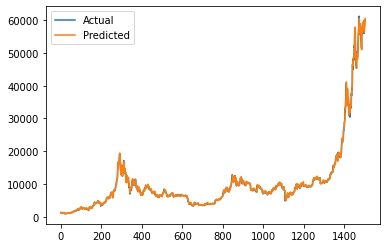

In [ ]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)                                  # проверяем тестовый набор
plt.plot(y, label="Actual")
plt.plot(model.predict(X), label="Predicted")
plt.legend()
print("TEST")   
print("MAE", mean_absolute_error(y_pred, y_test))              # ... на среднюю абсолютную ошибку (отклонение)
print("MAX", max_error(y_pred, y_test))                        # ... на максимальную ошибку (отклонение)
print("R2", r2_score(y_pred, y_test))                          # ... на R квадрат


y_full_prediction = model.predict(X)                           # проверяем обучающий набор
print("TRAIN")
print("MAE", mean_absolute_error(y_full_prediction, y))
print("MAX", max_error(y_full_prediction, y))
print("R2", r2_score(y_full_prediction, y))

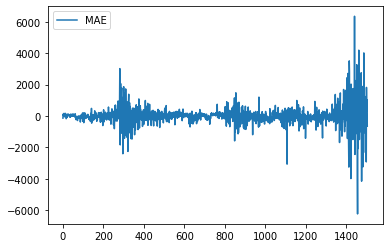

In [ ]:
plt.plot(y-model.predict(X), label="MAE")           # средняя абсолютная ошибка (отклонение), график
plt.legend()